<a href="https://colab.research.google.com/github/SachinPrasanth777/PyTorch/blob/main/Convolution_Layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

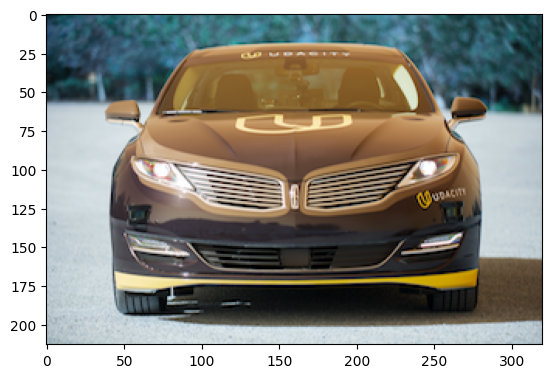

In [2]:
image_path = 'image.png'
bgr_img = cv2.imread(image_path)
plt.imshow(bgr_img,cmap="gray")
plt.show() # Image in RGB Configuration

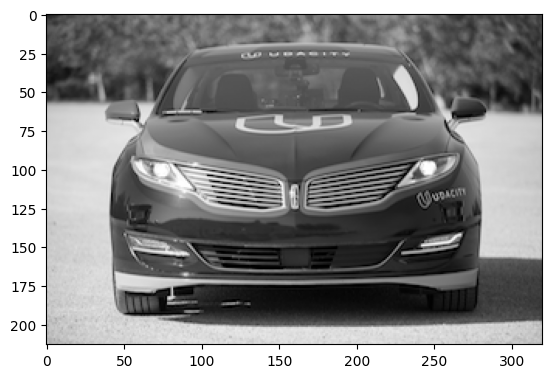

In [3]:
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY) # Gray Image
gray_img = gray_img.astype("float")/255 # Normalise and rescale it into values of range [0,1]
plt.imshow(gray_img,cmap="gray")
plt.show()

In [7]:
filter = np.array([[-1,-1,1,1],[-1,-1,1,1],[-1,-1,1,1],[-1,-1,1,1]])
print(f"Filters Shape: {filter.shape}")

Filters Shape: (4, 4)


In [8]:
filter1 = filter
filter2 = -filter1
filter3 = filter1.T
filter4 = -filter3
filters = np.array([filter1,filter2,filter3,filter4])
print(f"Filters Shape: {filters.shape}")

Filters Shape: (4, 4, 4)


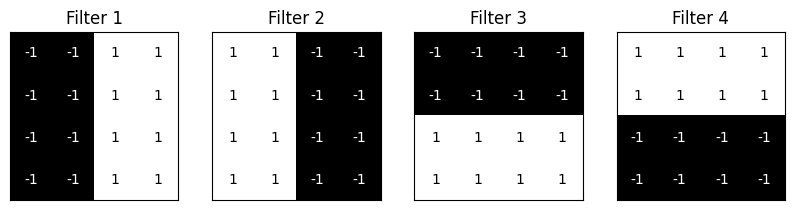

In [9]:
fig = plt.figure(figsize=(10,5))
for i in range(len(filters)):
  ax = fig.add_subplot(1, len(filters), i + 1, xticks=[], yticks=[])
  ax.imshow(filters[i],cmap="gray")
  ax.set_title('Filter %s' % str(i+1))
  width,height = filters[i].shape
  for x in range(width):
    for y in range(height):
      ax.annotate(str(filters[i][x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if filters[i][x][y]<0 else 'black')

In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self,weight):
    super(Net,self).__init__()
    k_height,k_width = weight.shape[2:]
    self.conv = nn.Conv2d(1,len(filters),kernel_size=(k_height,k_width),bias=False)
    self.conv.weight = torch.nn.Parameter(weight.type(torch.DoubleTensor))

  def forward(self,x):
    conv_x = self.conv(x)
    activated_x = F.relu(conv_x)
    return conv_x,activated_x

print(filters.shape)
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
print(weight.shape)
model = Net(weight.type(torch.DoubleTensor))

print(model)

(4, 4, 4)
torch.Size([4, 1, 4, 4])
Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
)


In [21]:
def viz_layer(layer, n_filters= len(filters)):
    fig = plt.figure(figsize=(20, 20))
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

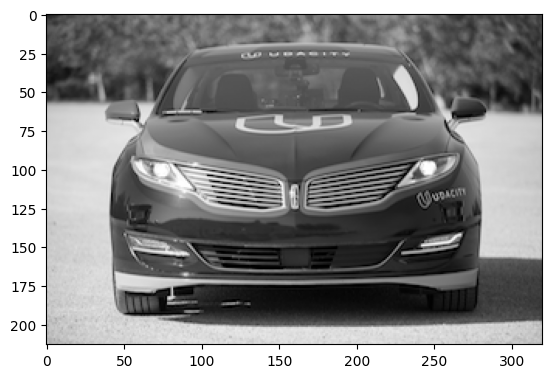

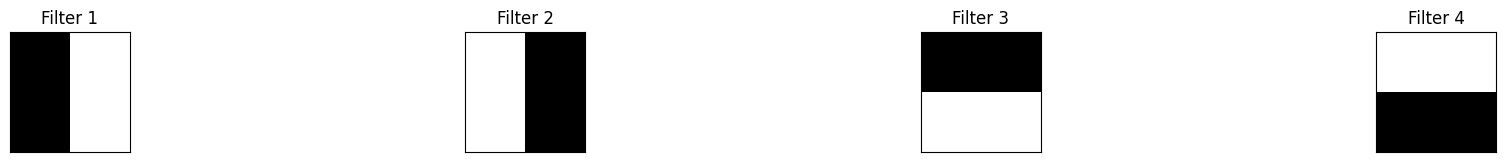

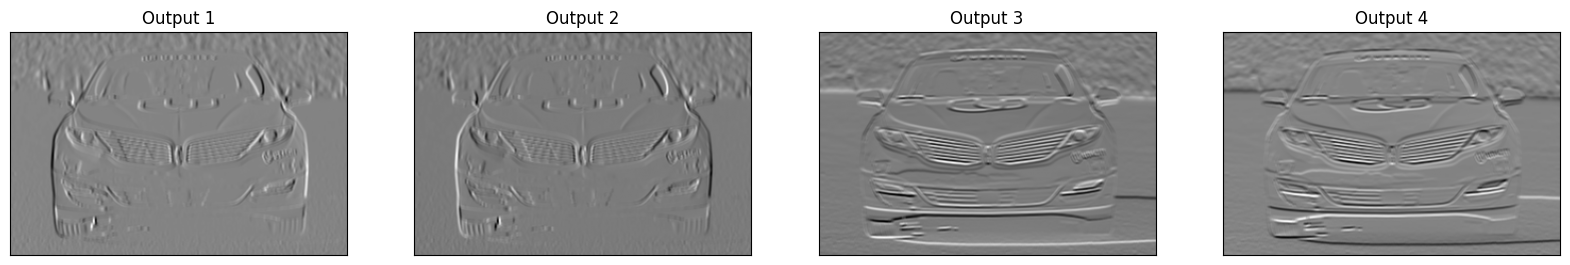

In [22]:
plt.imshow(gray_img, cmap='gray')

fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1).type(torch.DoubleTensor)

conv_layer, activated_layer = model(gray_img_tensor)

viz_layer(conv_layer)